In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

# 加载.mat文件
mat_data = scipy.io.loadmat('olivettifaces.mat')

# 查看文件中的变量名
print(mat_data.keys())

mat_data['u']

dict_keys(['__header__', '__version__', '__globals__', 'faces', 'p', 'u', 'v'])


array([[ 82.6, 151. ,  91.7, ...,  34.4,  64.2, 100.2],
       [ 82.5, 156.3,  88.8, ...,  36.4,  65.2, 100. ],
       [ 84.3, 160.3,  87.6, ...,  38.2,  69. ,  98.6],
       ...,
       [ 68.2,  29.9,  73.7, ...,  79.5,  59.4,  83.9],
       [ 67.1,  29.1,  70.9, ...,  80. ,  63.2,  85.9],
       [ 67. ,  28.1,  64.9, ...,  79.4,  65.5,  85.7]])

In [2]:
x = mat_data['faces']
x = x.T

In [3]:
random_index = np.random.permutation(len(x))
x = x[random_index]
example_faces = x[:36,:]
example_faces.shape

(36, 4096)

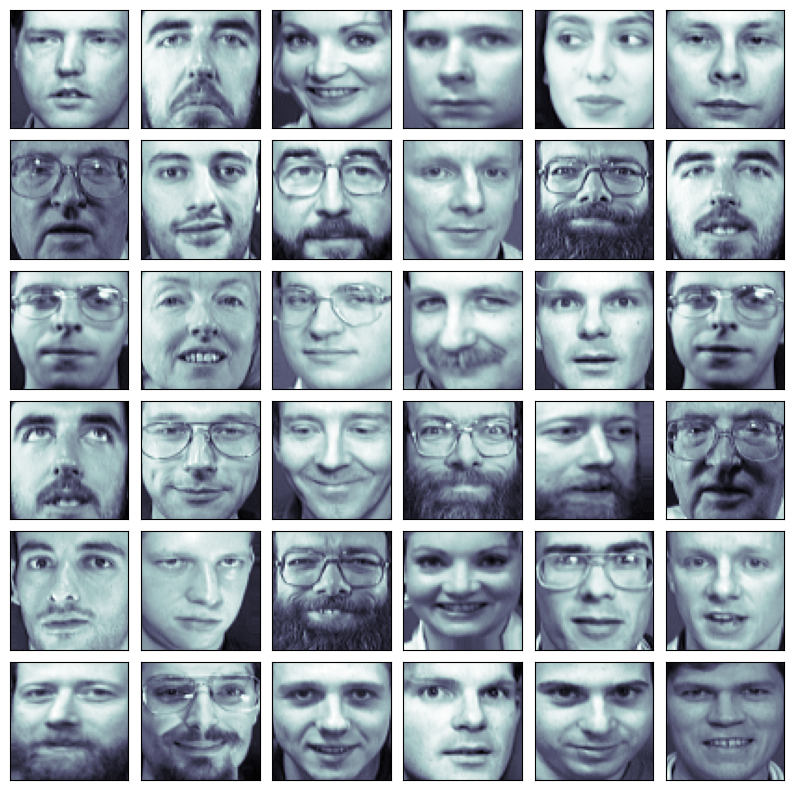

In [4]:
def plot_faces(data):
    fig,axes = plt.subplots(6,6,figsize = (10,10),subplot_kw = {'xticks':[],'yticks':[]},
    gridspec_kw = dict(hspace=0.1,wspace=0.1))
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(64,64).T,cmap='bone')
    plt.show()
plot_faces(example_faces)

In [5]:
%%time
from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'randomized')
pca.fit(x)

CPU times: user 3.28 s, sys: 225 ms, total: 3.51 s
Wall time: 1.05 s


PCA(svd_solver='randomized')

In [7]:
pca.components_.shape

(400, 4096)

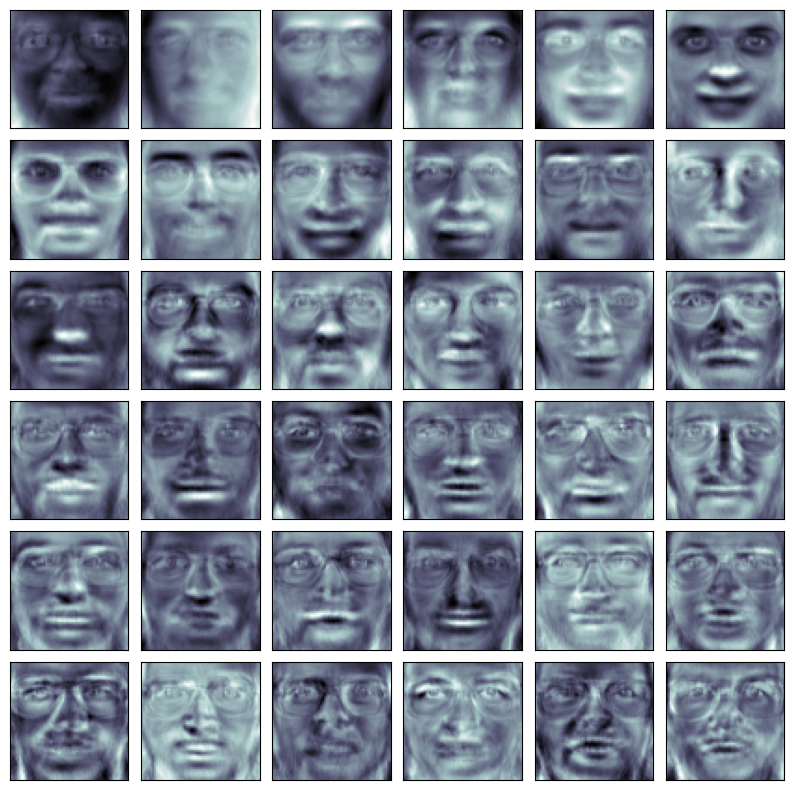

In [12]:
plot_faces(pca.components_[:36])